In [1]:
import pandas as pd
df = pd.read_csv('Houses-Price-cairo-Egypt.csv')
rows_to_select = ['Location_City','Bed_Rooms','Bath_Rooms', 'Home_Space_SQM','Property_price_EGP']
df = df[rows_to_select]
nasr_city = df[df['Location_City'] == 'Nasr City']
nasr_city = nasr_city.sort_values(by='Property_price_EGP').reset_index()
nasr_city = nasr_city.drop(['Location_City', 'index'], axis=1).replace(',','', regex=True)
nasr_city = nasr_city.astype(int)
filtered_nasr_city = pd.DataFrame(columns=nasr_city.columns)
filtered_nasr_city = pd.concat([filtered_nasr_city, nasr_city.iloc[[0]]], ignore_index=True)
for i in range(1, len(nasr_city)):
    if (nasr_city.iloc[i] > filtered_nasr_city.iloc[-1]).all():
        filtered_nasr_city = pd.concat([filtered_nasr_city, nasr_city.iloc[[i]]], ignore_index=True)
nasr_city = filtered_nasr_city.copy(deep=True)
new_columns = ['الغرف', 'الحمامات', 'المساحة', 'السعر']
nasr_city.columns = new_columns
nasr_city['السعر'] = nasr_city['السعر'].apply(lambda x: f"{x:,}")
nasr_city.style.hide(axis="index") 

الغرف,الحمامات,المساحة,السعر
2,1,60,"1,200,000"
3,2,190,"1,600,000"
4,3,300,"3,400,000"
6,4,450,"3,750,000"


In [2]:
test_example = pd.DataFrame({'الغرف':2, 'الحمامات':1, 'المساحة':90, 'السعر':'???'}, index=[0])
test_example.style.hide(axis="index")

الغرف,الحمامات,المساحة,السعر
2,1,90,???


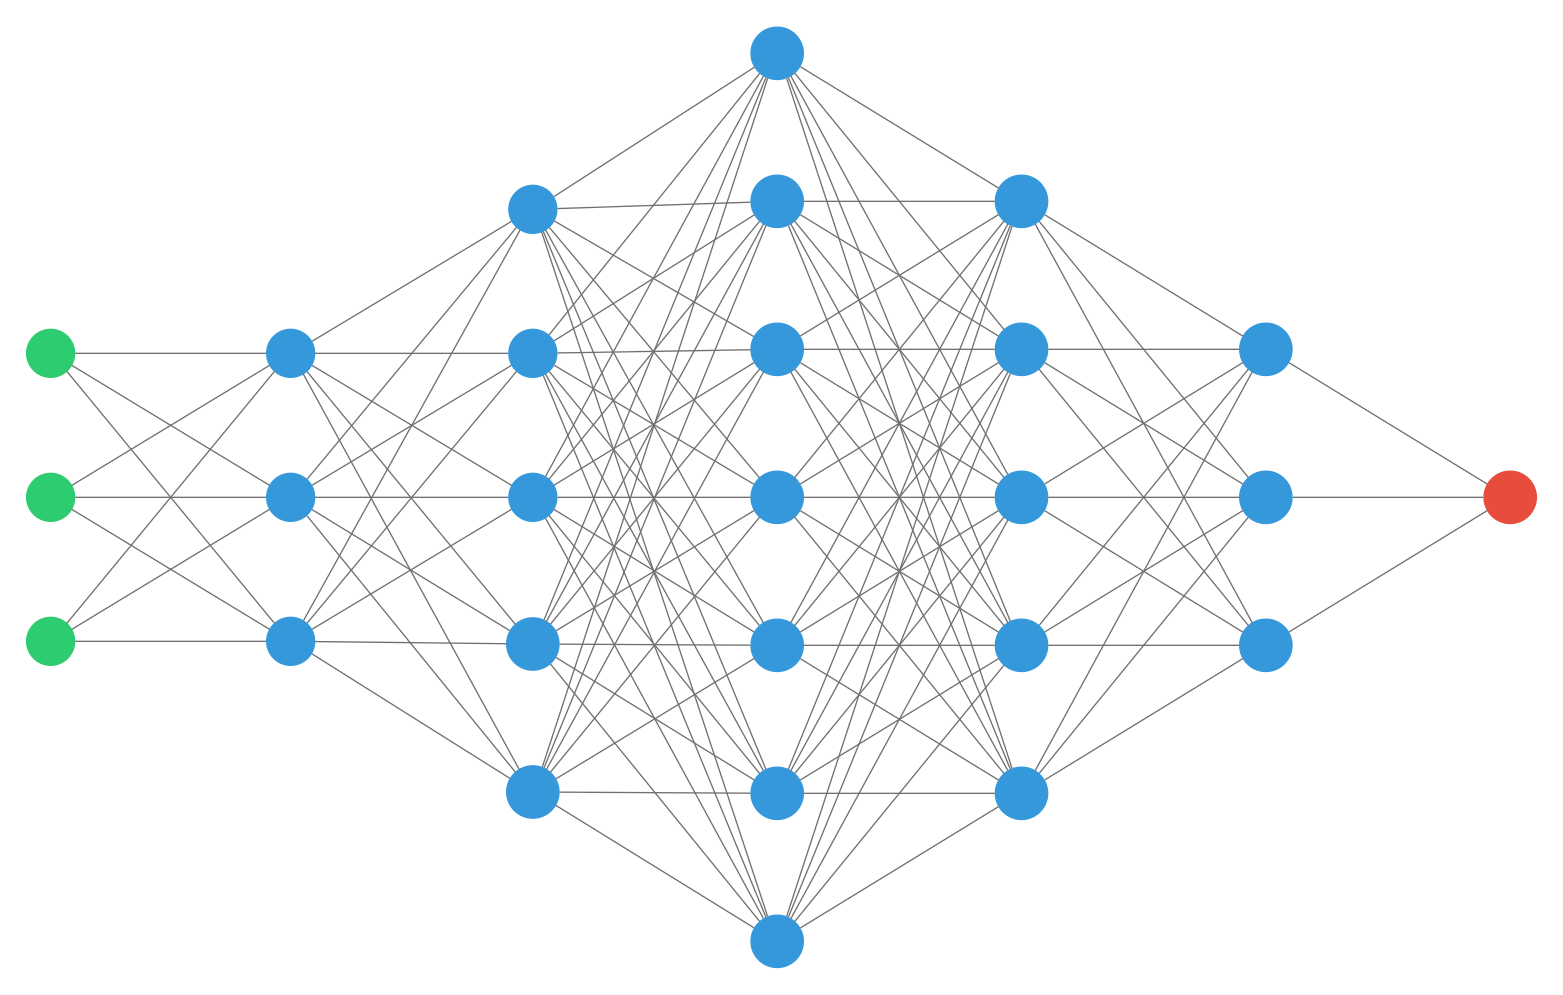

In [3]:
from keras import models, layers
import IPython
from ai_talks_utils import ai_talks_visualizer, clean_dir

model = models.Sequential([
    layers.Input((3,)),
    layers.Dense(3, activation='selu'),
    layers.Dense(5, activation='selu'),
    layers.Dense(7, activation='selu'),
    layers.Dense(5, activation='selu'),
    layers.Dense(3, activation='selu'),
    layers.Dense(1)
])

IPython.display.Image(filename=ai_talks_visualizer(model), width=400, height=400)

In [4]:
print(model.count_params(), 'parameters')

136 parameters


In [5]:
clean_dir('./')

Error deleting ./.git: [WinError 5] Access is denied: './.git'
Deleted: ./model_no_labels.png
Deleted: ./neural_network
Deleted: ./neural_network.dot
Deleted: ./nn_no_labels
Error deleting ./__pycache__: [WinError 5] Access is denied: './__pycache__'
